This notebook is largely based on the work of @aastroza, please see:

https://github.com/aastroza/structured-generation-benchmark/tree/main/evals/bfcl/notebooks


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Reading leaderboard data from 2024-04-26 version, filtering only ast simple evaluation category.

In [4]:
columns = ['Model', 'Simple Function AST']
df = pd.read_csv("../berkeley-function-call-leaderboard/score/data.csv")
df = df[columns].sort_values(by='Simple Function AST', ascending=False)
df

,Model,Simple Function AST
0,Microsoft/Phi-3-medium-4k-instruct (.txt + Pro...,96.25%
1,GPT-4-0125-Preview (Prompt),94.50%
2,GPT-4-1106-Preview (FC),91.00%
3,GPT-4-turbo-2024-04-09 (FC),90.50%
4,Microsoft/Phi-3-medium-4k-instruct (Prompt),86.75%
5,GPT-3.5-Turbo-0125 (Prompting),77.75%


Loading our benchmark results.

/Users/willkurt/miniconda3/envs/outlines-dev/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


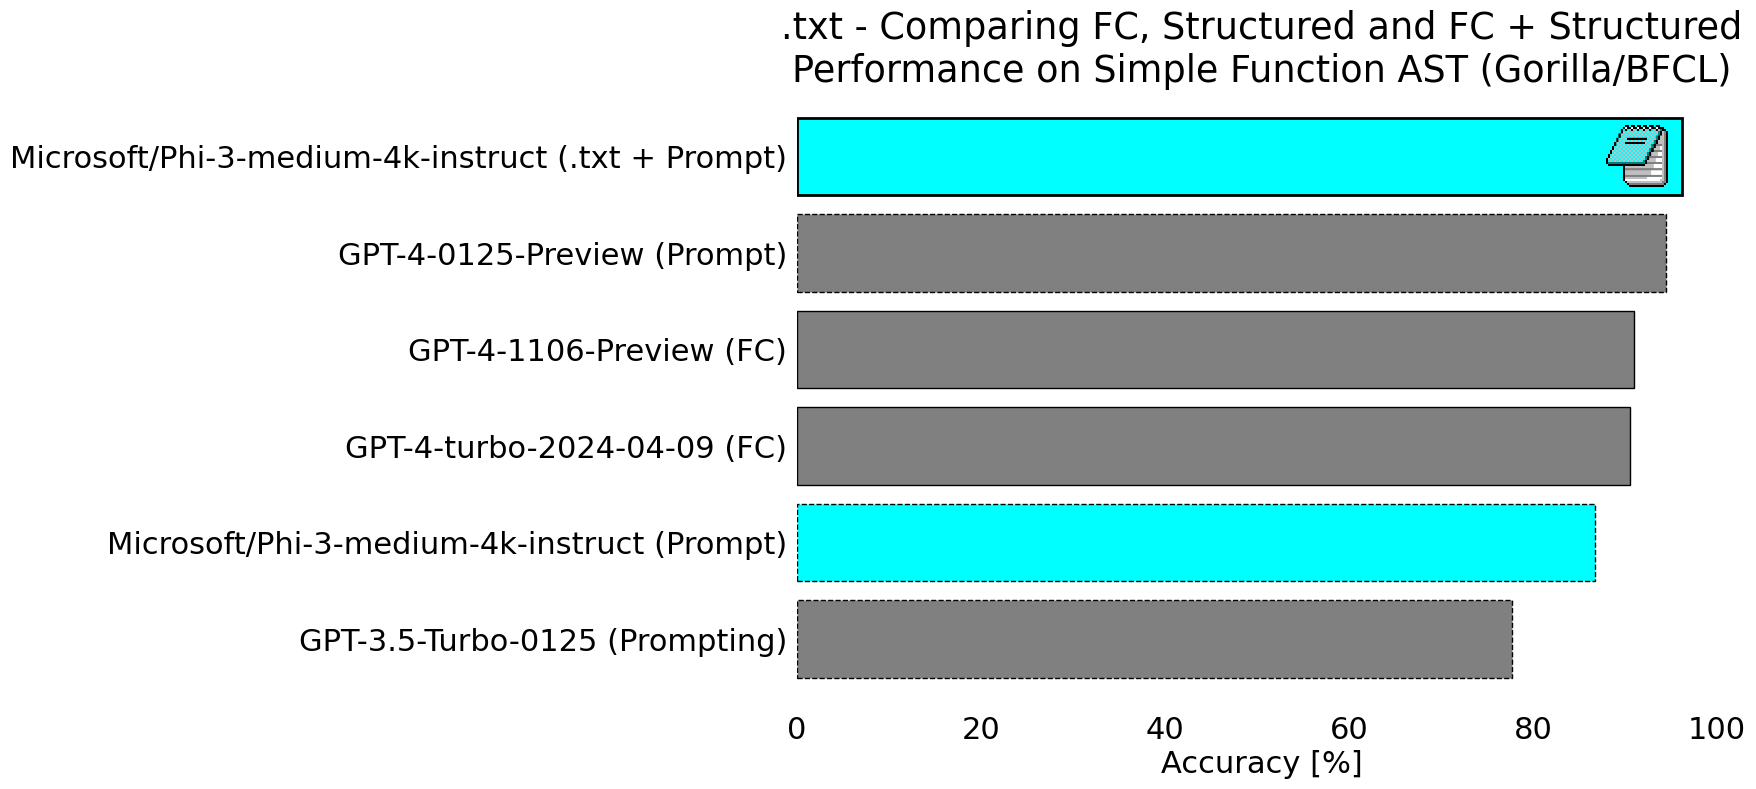

In [12]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
import matplotlib

logo = image.imread("../logo.png")
imagebox = OffsetImage(logo, zoom=0.1)
open_models = ["Microsoft/Phi-3-medium-4k-instruct (Prompt)", "Mistral-7B-Instruct-v0.3 (FC)" ]
matplotlib.rcParams.update({'font.size': 22})
def plot_bar_ranking(df_org, metric='Simple Function AST', keyword="Outlines"):
    df = df_org.copy(deep=True)
    df[metric] = df[metric].str.replace('%', '').astype(float)
    # Extract the model containing the keyword and find its prefix
    model_with_keyword = df[df["Model"].str.contains(keyword)]["Model"].iloc[0]
    prefix = "Microsoft"

    # Sorting the dataframe by performance in descending order
    df_sorted = df.sort_values(by=metric, ascending=True)

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.barh(df_sorted["Model"], df_sorted[metric], color='grey')
    ax.set_xlabel("Accuracy [%]")
    ax.set_title(f".txt - Comparing FC, Structured and FC + Structured\nPerformance on {metric} (Gorilla/BFCL)")

    # Highlight models starting with the same prefix as the model with the keyword
    highlight_color = "#00FFFF"
    highlight_color_light = "#BFBFBF"
    i = 0

    for bar, model in zip(bars, df_sorted["Model"]):
        if model in open_models:
            bar.set_color(highlight_color)
            bar.set_edgecolor(color='black')
        if "FC" in model:
            bar.set_edgecolor(color='black')
            bar.set_linestyle('solid')
        if "Prompt" in model:
            bar.set_edgecolor(color='black')
            bar.set_linestyle('dashed')
        if ".txt" in model:
            acc = df_sorted[df_sorted["Model"] == model][metric]
            ab = AnnotationBbox(imagebox,(acc,i), frameon=False,box_alignment=(1.25,0.5))
            ax.add_artist(ab)
            bar.set_color(highlight_color)
            bar.set_linestyle('solid')
            bar.set_linewidth(2)
            bar.set_edgecolor(color='black')


        i += 1
    #ax.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    plt.show()

    # metric string withouth spaces and in lower case
    metric_str = metric.replace(' ', '_').lower()
    #save fig
    fig.savefig(f'./figures/results.png', bbox_inches='tight', dpi=300)

plot_bar_ranking(df, metric='Simple Function AST', keyword=".txt")